In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv


# Data Import and Exploration

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv')
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [3]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0       Make      Model  Year  Mileage  Condition     Price
0             0       Ford  Silverado  2022    18107  Excellent  19094.75
1             1     Toyota  Silverado  2014    13578  Excellent  27321.10
2             2  Chevrolet      Civic  2016    46054       Good  23697.30
3             3       Ford      Civic  2022    34981  Excellent  18251.05
4             4  Chevrolet      Civic  2019    63565  Excellent  19821.85
..          ...        ...        ...   ...      ...        ...       ...
995         995     Nissan      Camry  2010   149032  Excellent  24548.50
996         996  Chevrolet      F-150  2014    20608  Excellent  26969.70
997         997       Ford     Altima  2016   109851       Good  20507.55
998         998     Toyota  Silverado  2010    11704       Good  31414.90
999         999     Nissan  Silverado  2017   128390  Excellent  18580.60

[1000 rows x 7 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

# Data Preprocessing and Exploratory Data Analysis (EDA)

First, we don't need the column 'Unnamed 0'. So, we just drop it

In [6]:
df =df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


And now, we can convert the 'condition' column into numerical form

In [7]:
df['Condition'].value_counts()

Condition
Excellent    595
Good         292
Fair         113
Name: count, dtype: int64

In [8]:
condition_mapping = {'Excellent': 2, 'Good': 1, 'Fair': 0}

df['Condition'] = df['Condition'].map(condition_mapping)
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,2,19094.75
1,Toyota,Silverado,2014,13578,2,27321.10
2,Chevrolet,Civic,2016,46054,1,23697.30
3,Ford,Civic,2022,34981,2,18251.05
4,Chevrolet,Civic,2019,63565,2,19821.85


### 1. Brand distribuion in the dataset

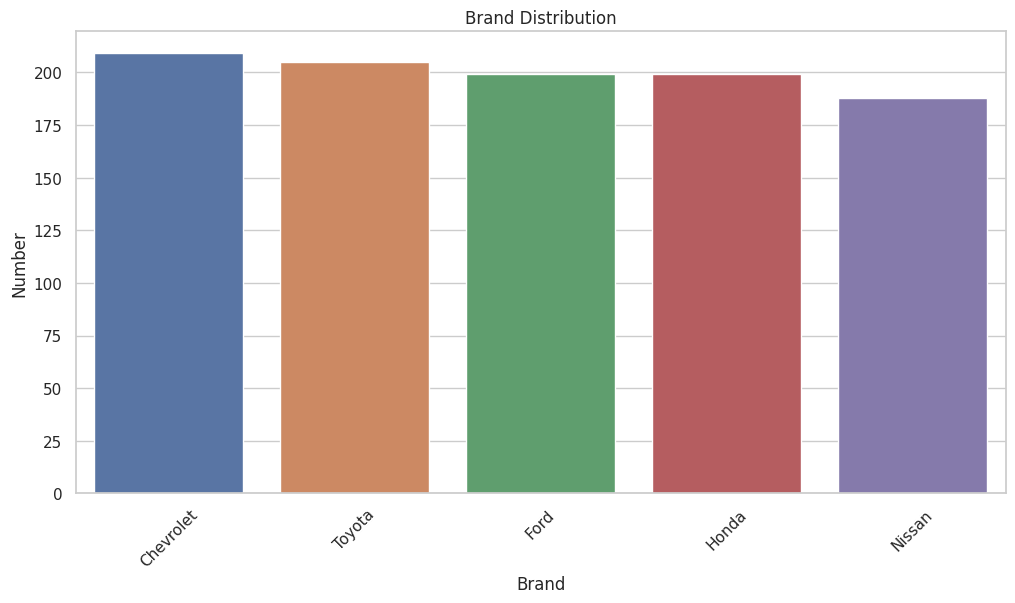

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

brand_num = df['Make'].value_counts()

plt.figure(figsize= (12,6))

sns.barplot(x = brand_num.index, y = brand_num.values)
plt.xlabel('Brand')
plt.ylabel('Number')
plt.title('Brand Distribution')
plt.xticks(rotation = 45)
plt.show()


### 2. Correlation between features

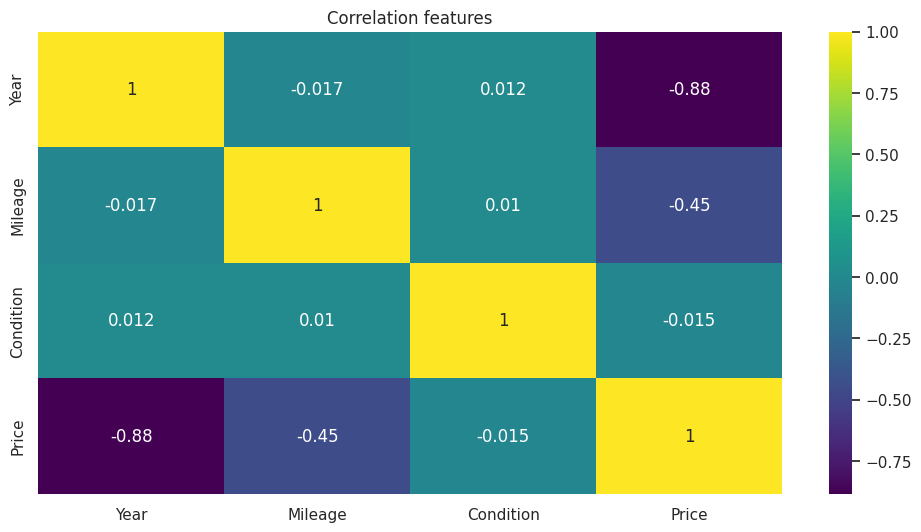

In [10]:
df_corr = ['Year', 'Mileage', 'Condition', 'Price']

plt.figure(figsize= (12,6))
sns.heatmap(df[df_corr].corr(), cmap = 'viridis', annot = True)
plt.title('Correlation features')
plt.show()

### 3. Pairwise relationships between numerical features

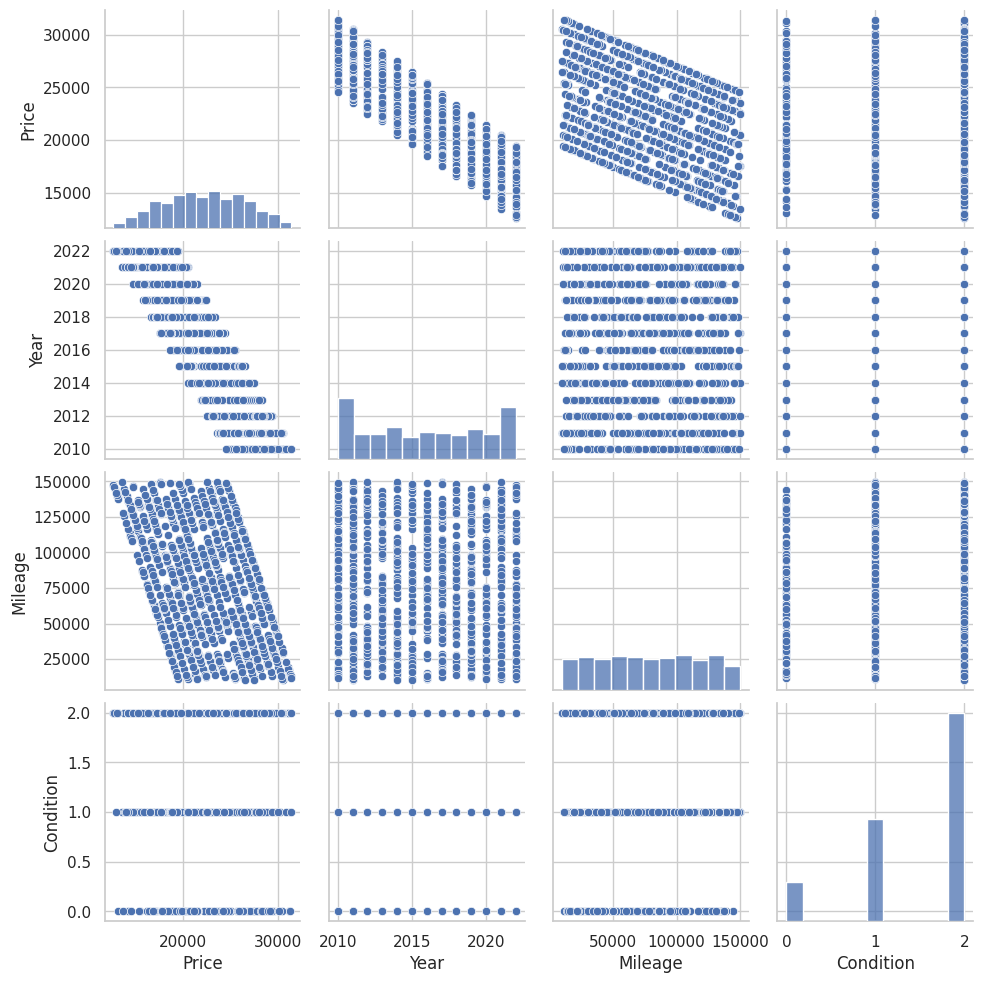

In [11]:
import warnings

warnings.filterwarnings('ignore')

sns.pairplot(df[['Price', 'Year', 'Mileage', 'Condition']])
plt.show()

### 4. Violinplot distribution of the price for the different features

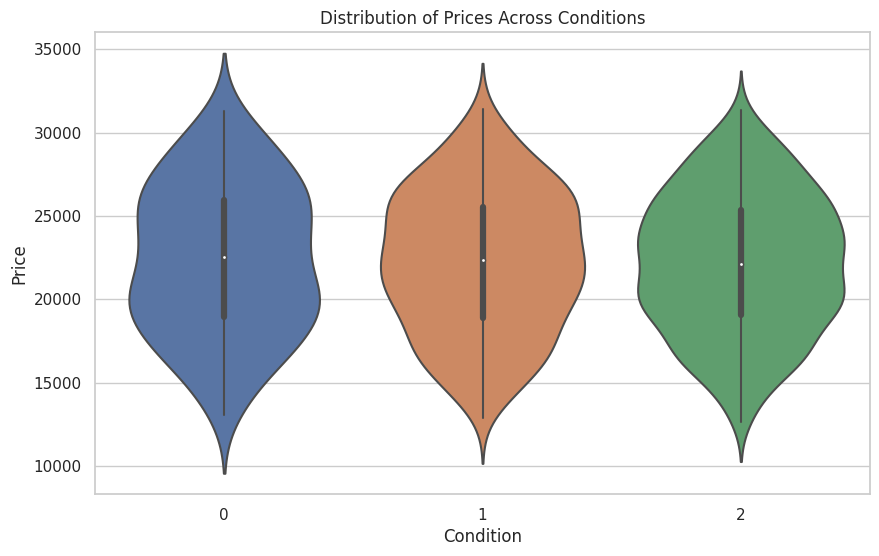

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Price', data=df)
plt.title('Distribution of Prices Across Conditions')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

# Model Building & Evaluation

We can use Linear Regression to predict

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

df = pd.get_dummies(df)

X, y= df.drop(['Price'], axis = 1), df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =23)
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

0.0038650681384128555


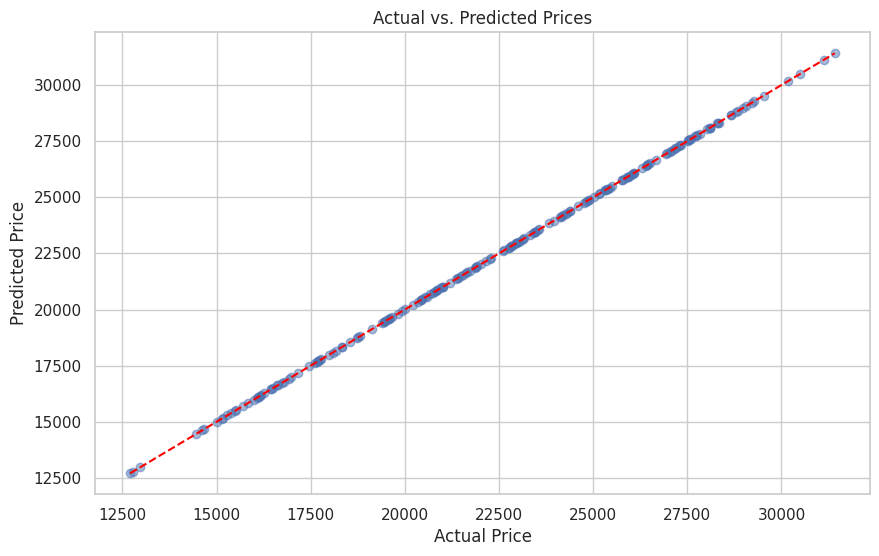

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()